# Install required packages

In [1]:
!pip install scikit-learn
!pip install sklearn_evaluation
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

# Split dataset into training and test using Train_Test_Split method

In [2]:
# Preprocessing
import pandas as pd #import pandas library for reading CSV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset and drop duplicates if any
data = pd.read_csv('steel.csv')
data = data.drop_duplicates().reset_index(drop=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('tensile_strength', axis=1),  # Drop the target column from features
    data['tensile_strength'], # Target variable
    test_size=0.25, # 25% test size
    random_state=42) # Random state for reproducibility 



# K Nearest Neighbour Model Fitting Without any Preprocessing or Cross Fold Validation

In [3]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS (without cross fold validation)====

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)

print("\n=== Training Data Performance ===")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}") # Mean Squared Error for training data
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}") # Metric for how well model performs on training data it already saw

y_test_pred = knn_model.predict(X_test)
print("\n=== Test Data Performance ===")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}") # Mean Squared Error for test data
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}") # Metric for how well model performs on test data it hasn't seen before


=== Training Data Performance ===
Train MSE: 2198.7867
Train R²: 0.7278

=== Test Data Performance ===
Test MSE: 2487.1518
Test R²: 0.7212


# 10 Fold Cross Validation with no pre processing

In [4]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS====

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

knn_default = KNeighborsRegressor()

cv_results_default = cross_validate(
    knn_default,
    X_train,  
    y_train, 
    cv=10,
    scoring={
        'mse': 'neg_mean_squared_error',  # Domain-specific
        'r2': 'r2'                         # Domain-independent
    },
    return_train_score=True,
    n_jobs=-1
)

print("\nDefault Results (averaged over 10 folds):")
print(f"  Training MSE:   {-cv_results_default['train_mse'].mean():.4f} "
      f"(± {cv_results_default['train_mse'].std():.4f})")
print(f"  Test MSE:       {-cv_results_default['test_mse'].mean():.4f} "
      f"(± {cv_results_default['test_mse'].std():.4f})")
print(f"  Training R²:    {cv_results_default['train_r2'].mean():.4f} "
      f"(± {cv_results_default['train_r2'].std():.4f})")
print(f"  Test R²:        {cv_results_default['test_r2'].mean():.4f} "
      f"(± {cv_results_default['test_r2'].std():.4f})")


Default Results (averaged over 10 folds):
  Training MSE:   2243.2650 (± 83.5524)
  Test MSE:       3392.2180 (± 671.9795)
  Training R²:    0.7222 (± 0.0074)
  Test R²:        0.5628 (± 0.0757)


# Scale the Features in the dataset

In [24]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("\nOriginal feature ranges:")
print(X_train.describe().loc[['min', 'max']])
print("\nScaled feature ranges:")
print(X_train_scaled.describe().loc[['min', 'max']])

X_test_scaled  = scaler.transform(X_test)



Original feature ranges:
     normalising_temperature  tempering_temperature  percent_silicon  \
min                    178.5                  225.0           0.0000   
max                    945.0                  950.0           0.3594   

     percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
min          0.745783           0.594           0.801            0.000   
max          1.794173           0.945           1.125            0.322   

     percent_carbon  percent_manganese  
min           1.378               0.00  
max           2.470               1.93  

Scaled feature ranges:
     normalising_temperature  tempering_temperature  percent_silicon  \
min                -1.954477              -2.010019        -0.778788   
max                 2.981709               0.769878         3.659857   

     percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
min         -2.058565       -2.867715       -2.327839        -1.099080   
max          1.999349 

# Test out model performance after feature scaling with 10 fold cross validation using default hyperparameters

In [25]:
# ==== GAUSSIAN PROCESS REGRESSION MODEL TRAINING WITH DEFAULT HYPERPARAMETERS (With cross fold validation after feature scaling)====

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

knn_model = KNeighborsRegressor()

cv_results = cross_validate(
    knn_model,
    X_train_scaled,  
    y_train, 
    cv=10,
    scoring={
        'mse': 'neg_mean_squared_error',  # Domain-specific
        'r2': 'r2'                         # Domain-independent
    },
    return_train_score=True,
    n_jobs=-1
)

print("\nDefault Results (averaged over 10 folds) with feature scaling:")
print(f"  Training MSE:   {-cv_results_default['train_mse'].mean():.4f} "
      f"(± {cv_results_default['train_mse'].std():.4f})")
print(f"  Test MSE:       {-cv_results_default['test_mse'].mean():.4f} "
      f"(± {cv_results_default['test_mse'].std():.4f})")
print(f"  Training R²:    {cv_results_default['train_r2'].mean():.4f} "
      f"(± {cv_results_default['train_r2'].std():.4f})")
print(f"  Test R²:        {cv_results_default['test_r2'].mean():.4f} "
      f"(± {cv_results_default['test_r2'].std():.4f})")


Default Results (averaged over 10 folds) with feature scaling:
  Training MSE:   2243.2650 (± 83.5524)
  Test MSE:       3392.2180 (± 671.9795)
  Training R²:    0.7222 (± 0.0074)
  Test R²:        0.5628 (± 0.0757)


# Hyperparameter/ Model Fine Tuning With GridSearchCV

### GridSearch using scaled features

In [31]:

from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn_evaluation import plot
 
parameters = {
    'metric': [
        'euclidean',
        'manhattan',
        'chebyshev',
        'minkowski'
    ],

    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

knn_scaled_tuned = GridSearchCV(knn_model, 
                   parameters,
                   cv=10,
                   n_jobs=-1,
                   verbose=2,
                   scoring = {
                       'mse': 'neg_mean_squared_error',
                       'r2': 'r2'
                   },
                   refit = 'mse',
                   return_train_score=True
                )

# Fit the model
knn_scaled_tuned.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters found:")
print(f"  Distance Metric: {knn_scaled_tuned.best_params_['metric']}")
print(f"  Number of Neighbors:  {knn_scaled_tuned.best_params_['n_neighbors']}")
print(f"  Best CV MSE: {-knn_scaled_tuned.best_score_:.4f}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean,

### GridSearch NOT using scaled features

In [30]:
 
parameters = {
    'metric': [
        'euclidean',
        'manhattan',
        'chebyshev',
        'minkowski'
    ],

    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

knn_default_tuned = GridSearchCV(knn_model, 
                   parameters,
                   cv=10,
                   n_jobs=-1,
                   verbose=2,
                   scoring = {
                       'mse': 'neg_mean_squared_error',
                       'r2': 'r2'
                   },
                   refit = 'mse',
                   return_train_score=True
                )

# Fit the model
knn_default_tuned.fit(X_train, y_train)

# Print best parameters and score
print(f"\nBest parameters found:")
print(f"  Distance Metric: {knn_default_tuned.best_params_['metric']}")
print(f"  Number of Neighbors:  {knn_default_tuned.best_params_['n_neighbors']}")
print(f"  Best CV MSE: {-knn_default_tuned.best_score_:.4f}")

Fitting 10 folds for each of 44 candidates, totalling 440 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.1s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean,

# Plot Results from GridSearchCV

['euclidean' 'manhattan' 'chebyshev' 'minkowski']


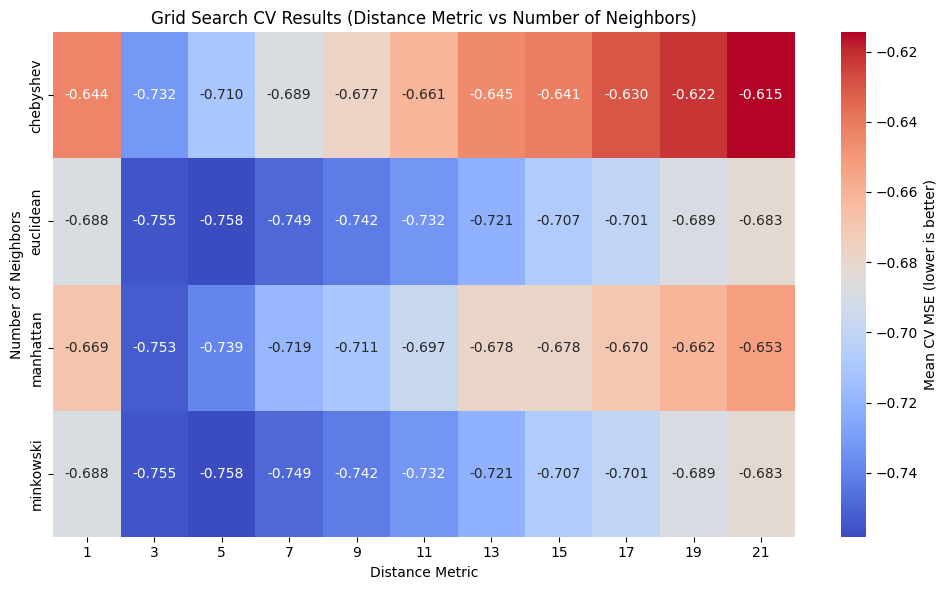

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract all results from GridSearchCV
cv_results = pd.DataFrame(knn_scaled_tuned.cv_results_)

# To properly understand visually flip the sign of the mean test score (since it's negative MSE)
cv_results['mean_R2'] = -cv_results['mean_test_r2']
# Convert kernel objects to strings (so they're easy to plot)
cv_results['param_metric'] = cv_results['param_metric'].astype(str)
print(cv_results['param_metric'].unique())

# cv_results['param_metric'] = cv_results['param_metric'].replace({
#     '1**2': 'ConstantKernel',
#     '1**2 * RBF(length_scale=1)': 'Constant*RBF',
#     'RBF(length_scale=1)': 'RBF',
#     'DotProduct(sigma_0=1)': 'DotProduct',
#     'WhiteKernel(noise_level=0.5)': 'WhiteKernel'
# })


# Pivot the results: rows=kernels, columns=alpha, values=mean MSE
pivot_table = cv_results.pivot_table(
    values='mean_R2',
    index='param_metric',
    columns='param_n_neighbors'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean CV MSE (lower is better)'}
)
plt.title("Grid Search CV Results (Distance Metric vs Number of Neighbors)")
plt.xlabel("Distance Metric")
plt.ylabel("Number of Neighbors")
plt.tight_layout()
plt.show()


['euclidean' 'manhattan' 'chebyshev' 'minkowski']


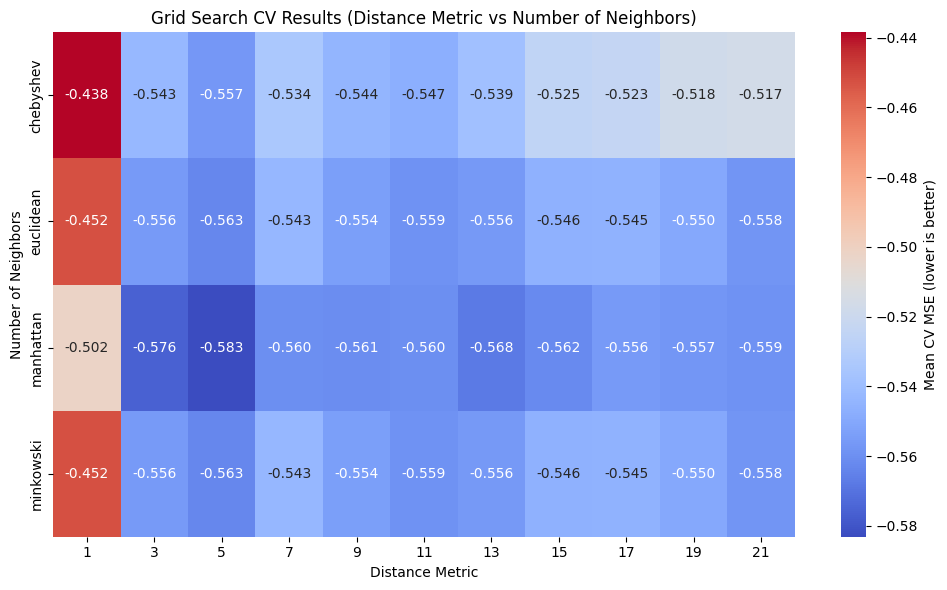

In [36]:
# Extract all results from GridSearchCV
cv_results = pd.DataFrame(knn_default_tuned.cv_results_)

# To properly understand visually flip the sign of the mean test score (since it's negative MSE)
cv_results['mean_R2'] = -cv_results['mean_test_r2']
# Convert kernel objects to strings (so they're easy to plot)
cv_results['param_metric'] = cv_results['param_metric'].astype(str)
print(cv_results['param_metric'].unique())

# cv_results['param_metric'] = cv_results['param_metric'].replace({
#     '1**2': 'ConstantKernel',
#     '1**2 * RBF(length_scale=1)': 'Constant*RBF',
#     'RBF(length_scale=1)': 'RBF',
#     'DotProduct(sigma_0=1)': 'DotProduct',
#     'WhiteKernel(noise_level=0.5)': 'WhiteKernel'
# })


# Pivot the results: rows=kernels, columns=alpha, values=mean MSE
pivot_table = cv_results.pivot_table(
    values='mean_R2',
    index='param_metric',
    columns='param_n_neighbors'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar_kws={'label': 'Mean CV MSE (lower is better)'}
)
plt.title("Grid Search CV Results (Distance Metric vs Number of Neighbors)")
plt.xlabel("Distance Metric")
plt.ylabel("Number of Neighbors")
plt.tight_layout()
plt.show()


In [37]:
# Using the best values from GridSearchCV to train a final model and test on hold-out test dataset
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score

# Convert scaled arrays back to DataFrames to preserve feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFinal Model Performance with Feature Scaling:")

# Predict on training data
y_train_pred = knn_scaled_tuned.predict(X_train_scaled_df)
print("\n=== Training Data Performance ===")
print(f"Train MSE:  {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

# Predict on test data
y_test_pred = knn_scaled_tuned.predict(X_test_scaled_df)
print("\n=== Test Data Performance ===")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test R²:   {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")


Final Model Performance with Feature Scaling:

=== Training Data Performance ===
Train MSE:  1138.0447
Train R²:   0.8591
Train RMSE: 33.73

=== Test Data Performance ===
Test MSE:  2760.2696
Test R²:   0.6906
Test RMSE: 52.54


In [38]:
# Using the best values from GridSearchCV to train a final model and test on hold-out test dataset
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score

print("\nFinal Model Performance without Feature Scaling:")

# Predict on training data
y_train_pred = knn_default_tuned.predict(X_train)
print("\n=== Training Data Performance ===")
print(f"Train MSE:  {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Train R²:   {r2_score(y_train, y_train_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

# Predict on test data
y_test_pred = knn_default_tuned.predict(X_test)
print("\n=== Test Data Performance ===")
print(f"Test MSE:  {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"Test R²:   {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")


Final Model Performance without Feature Scaling:

=== Training Data Performance ===
Train MSE:  2083.3808
Train R²:   0.7421
Train RMSE: 45.64

=== Test Data Performance ===
Test MSE:  2407.8347
Test R²:   0.7301
Test RMSE: 49.07
